# Imports

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

import warnings
warnings.filterwarnings("ignore")


# Load Dataset into DataFrame

In [4]:
# df = pd.read_csv('drug_addiction_dataset.csv')

In [5]:
# df = pd.read_csv("final_cleaned_dataset_merged_mental_health (1).csv")

In [146]:
df = pd.read_csv("final_cleaned_dataset_merged_mental_health_50000.csv")

# Basic Information About Data

### Data Shape

In [150]:
df.shape

(50000, 23)

### Data Info

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    50000 non-null  int64 
 1   Age                   50000 non-null  int64 
 2   Gender                50000 non-null  object
 3   Education_Level       50000 non-null  object
 4   Occupation            50000 non-null  object
 5   Income_Level          50000 non-null  object
 6   Medical_Condition     50000 non-null  object
 7   Social_Behavior       50000 non-null  object
 8   Peer_Influence        50000 non-null  object
 9   Living_Situation      30729 non-null  object
 10  Legal_Issues          30701 non-null  object
 11  Drug_Motive           30625 non-null  object
 12  Social_Time_Spent     30634 non-null  object
 13  Life_Failure          30977 non-null  object
 14  Mental_Health_Issues  50000 non-null  object
 15  Lives_With_User       31030 non-null

### Statistical Summary

In [156]:
df.select_dtypes(include=['int64', 'float64']).describe()

,ID,Age
count,50000.000000,50000.000000
mean,550121.458280,32.624720
std,259406.526078,13.362063
min,100004.000000,12.000000
25%,326485.000000,21.000000
50%,550638.000000,29.000000
75%,774383.500000,44.000000
max,999997.000000,66.000000


### Top 5 Values

In [159]:
df.head(5)

,ID,Age,Gender,Education_Level,Occupation,Income_Level,Medical_Condition,Social_Behavior,Peer_Influence,Living_Situation,...,Life_Failure,Mental_Health_Issues,Lives_With_User,Smoking_Status,Drug_Experience,Friend_Influence,Willingness_To_Try,Self_Control,Usage_Frequency,Label
0,536321,19,Male,Master's,Unemployed,Low,Depression,Multiple Arrests,Many Friends Use,Hostel/Hall,...,Yes,None / I don't know,No,"Yes, every day.",Yes,"No, they don't",maybe,"No, It's not possible",Once/twice a week,Non-Addict
1,384818,44,Female,High School,Clerk,Medium,Heart Disease,Minor Offense,Many Friends Use,With Family/Relatives,...,No,Depression/Guilt,No,"Yes, every day.",Yes,"Yes, often they do",NaN,"No, It's not possible",Once/twice a week,Non-Addict
2,707763,47,Female,High School,Unemployed,Medium,Diabetes,Therapy Ongoing,Some Friends Use,With Family/Relatives,...,Yes,Depression/Guilt,Yes,"Yes, occasionally",Yes,"No, they don't",yes,"No, It's not possible",Never/ Not applicable,Drug Addict
3,294635,29,Female,No Formal Education,Student,Medium,Diabetes,Minor Offense,No Influence,With Family/Relatives,...,No,Anxiety/Stress,No,"Yes, occasionally",Yes,"No, they don't",yes,"Yes, It's possible",Regularly,Non-Addict
4,223564,18,Female,Bachelor's,Engineer,Medium,Healthy,No Criminal Record,Some Friends Use,With Family/Relatives,...,Yes,Depression/Guilt,No,"No, I don't",Yes,NaN,no,"Yes, It's possible",NaN,Non-Addict


# Pre Processing

## Dropping ID

In [163]:
df = df.drop(columns=['ID'], axis=1)

## Handling Missing Values

In [166]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Impute numerical features with mean
for columns in numerical_columns:
    df[columns].fillna(df[columns].mean(), inplace=True)

# Impute categorical features with mode
for columns in categorical_columns:
    df[columns].fillna(df[columns].mode()[0], inplace=True)

In [168]:
# rechecking missing values

df.isna().sum()

Age                     0
Gender                  0
Education_Level         0
Occupation              0
Income_Level            0
Medical_Condition       0
Social_Behavior         0
Peer_Influence          0
Living_Situation        0
Legal_Issues            0
Drug_Motive             0
Social_Time_Spent       0
Life_Failure            0
Mental_Health_Issues    0
Lives_With_User         0
Smoking_Status          0
Drug_Experience         0
Friend_Influence        0
Willingness_To_Try      0
Self_Control            0
Usage_Frequency         0
Label                   0
dtype: int64

# Data Visualization (Key Features)

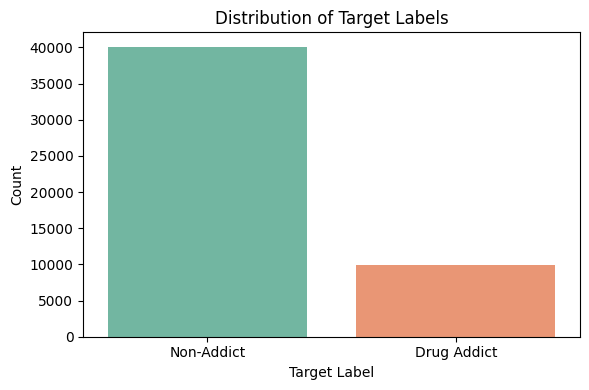

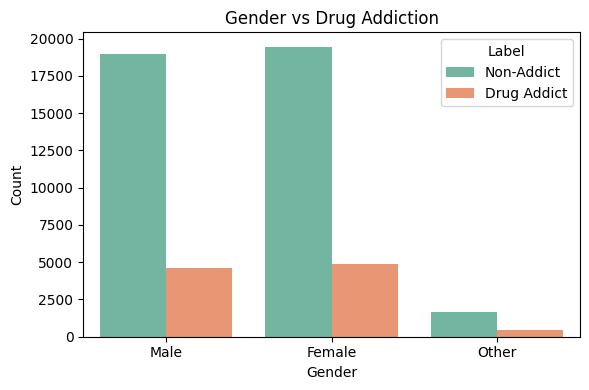

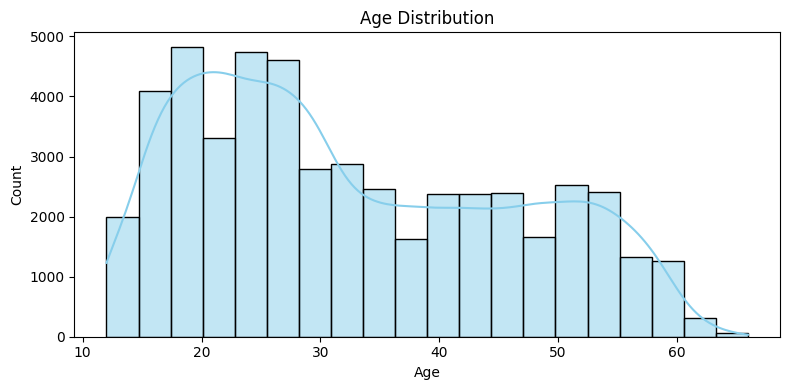

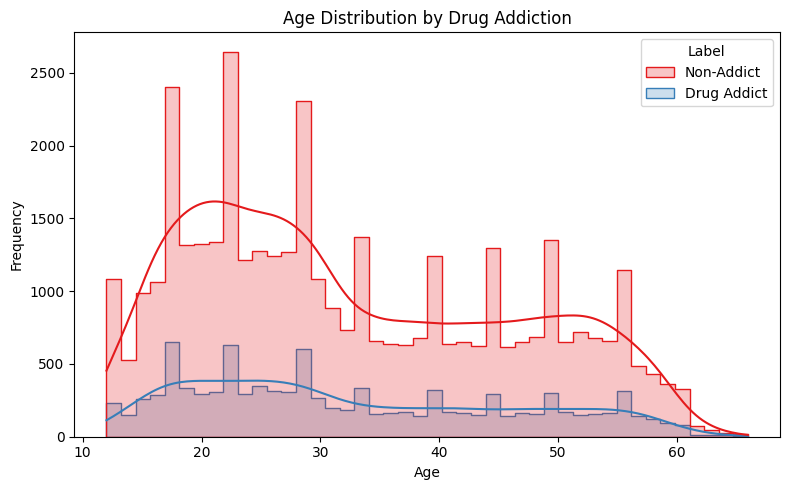

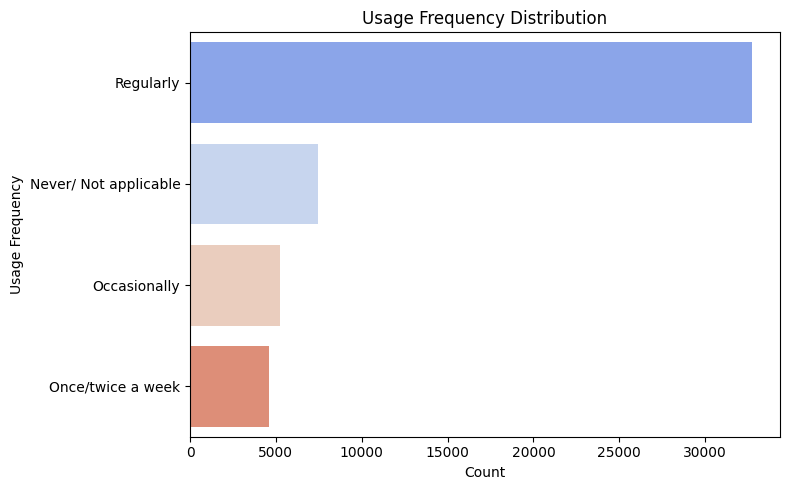

In [171]:
# Label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Label', palette='Set2')
plt.title("Distribution of Target Labels")
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print('\n')

# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Label', palette='Set2')
plt.title('Gender vs Drug Addiction')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print('\n')

# Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.tight_layout()
plt.show()

print('\n')

# Age distribution by addiction
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Label', kde=True, element='step', palette='Set1')
plt.title('Age Distribution by Drug Addiction')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print('\n')

# Usage Frequency distribution
usage_counts = df['Usage_Frequency'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(y=usage_counts.index, x=usage_counts.values, palette='coolwarm')
plt.title("Usage Frequency Distribution")
plt.xlabel("Count")
plt.ylabel("Usage Frequency")
plt.tight_layout()
plt.show()

# Conversion of Categorical Data to Numeric

## Checking Categories of each categorical Data

In [175]:
df.Gender.value_counts()

Gender
Female    24306
Male      23605
Other      2089
Name: count, dtype: int64

In [177]:
df.Education_Level.value_counts()

Education_Level
High School            20219
Bachelor's             12643
No Formal Education     9985
Master's                4612
PhD                     2541
Name: count, dtype: int64

In [179]:
df.Occupation.value_counts()

Occupation
Student       10235
Unemployed     7385
Teacher        5093
Business       5073
Laborer        5065
Engineer       5051
Clerk          4798
Artist         3803
Doctor         3497
Name: count, dtype: int64

In [181]:
df.Income_Level.value_counts()

Income_Level
Low       25209
Medium    17432
High       7359
Name: count, dtype: int64

In [183]:
df.Medical_Condition.value_counts()

Medical_Condition
Healthy          24562
Diabetes          5198
Heart Disease     5109
Anxiety           5103
Hypertension      5090
Depression        4938
Name: count, dtype: int64

In [185]:
df.Social_Behavior.value_counts()

Social_Behavior
No Criminal Record    27991
Multiple Arrests       5924
Minor Offense          5501
Rehab Attended         5471
Therapy Ongoing        5113
Name: count, dtype: int64

In [186]:
df.Peer_Influence.value_counts()

Peer_Influence
No Influence        19713
Some Friends Use    14826
Many Friends Use    10130
Peer Pressure        5331
Name: count, dtype: int64

In [189]:
df.Living_Situation.value_counts()

Living_Situation
With Family/Relatives    39492
Hostel/Hall               7946
Alone                     2562
Name: count, dtype: int64

In [191]:
df.Legal_Issues.value_counts()

Legal_Issues
No     42886
Yes     7114
Name: count, dtype: int64

In [193]:
df.Drug_Motive.value_counts()

Drug_Motive
Disease, Should avoid                  35682
Disease                                 6252
Social trend                            3797
Should avoid                            3501
Social trend, Should avoid               387
Disease, Social trend                    222
Disease, Social trend, Should avoid      159
Name: count, dtype: int64

In [195]:
df.Social_Time_Spent.value_counts()

Social_Time_Spent
Friends              30381
Family/ Relatives     8085
Alone                 5017
Job/Work place        2805
Hostel                1899
Business               917
School                 896
Name: count, dtype: int64

In [197]:
df.Life_Failure.value_counts()

Life_Failure
No     39186
Yes    10814
Name: count, dtype: int64

In [199]:
df.Mental_Health_Issues.value_counts()

Mental_Health_Issues
Anxiety/Stress         16753
Depression/Guilt       14904
None / I don't know    12556
Anger Issues            4595
Multiple Conditions     1192
Name: count, dtype: int64

In [201]:
df.Lives_With_User.value_counts()

Lives_With_User
No          39778
Yes         10047
Not sure      175
Name: count, dtype: int64

In [203]:
df.Smoking_Status.value_counts()

Smoking_Status
Yes, every day.      33146
Yes, occasionally     8812
No, I don't           8042
Name: count, dtype: int64

In [205]:
df.Drug_Experience.value_counts()

Drug_Experience
Yes    42381
No      7619
Name: count, dtype: int64

In [207]:
df.Friend_Influence.value_counts()

Friend_Influence
No, they don't        40096
Yes, often they do     9904
Name: count, dtype: int64

In [209]:
df.Willingness_To_Try.value_counts()

Willingness_To_Try
no       33749
maybe     8152
yes       8099
Name: count, dtype: int64

In [211]:
df.Self_Control.value_counts()

Self_Control
No, It's not possible    40420
Yes, It's possible        9580
Name: count, dtype: int64

In [213]:
df.Usage_Frequency.value_counts()

Usage_Frequency
Regularly                32728
Never/ Not applicable     7427
Occasionally              5227
Once/twice a week         4618
Name: count, dtype: int64

In [215]:
df.Label.value_counts()

Label
Non-Addict     40073
Drug Addict     9927
Name: count, dtype: int64

# Splitting the Data into Features (X) and Target (y)

In [218]:
X = df.drop(columns=['Label'], axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Converting the Categorical Data into Numeric Data

### Mapping Labels (0: Non-Addict, 1:Drug Addict)

In [222]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # Now 'Non-Addict' -> 0, 'Drug Addict' -> 1
y_test = le.transform(y_test)


#### Creating a numeric Pipeline for Scaling Age using Standard Scalar

In [225]:
numeric_features = ['Age']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#### Convert Ordinal Data into Numeric

In [228]:
# ordinal_transformer = ColumnTransformer(
#     transformers=[
#         ('Education_Level', OrdinalEncoder(categories=['No Formal Education', 'High School', "Bachelor's", "Master's", 'PhD']), ['Education_Level']),
#         ('Income_Level', OrdinalEncoder(categories=['Low', 'Medium', 'High']), ['Income_Level']),
#         ('Peer_Influence', OrdinalEncoder(categories=['No Influence', 'Some Friends Use', 'Many Friends Use', 'Peer Pressure']), ['Peer_Influence']),
#         ('Legal_Issues', OrdinalEncoder(categories=['No', 'Yes']), ['Legal_Issues']),
#         ('Life_Failure', OrdinalEncoder(categories=['No', 'Yes']), ['Life_Failure']),
#         ('Lives_With_User', OrdinalEncoder(categories=['No', 'Yes']), ['Lives_With_User']),
#         ('Smoking_Status', OrdinalEncoder(categories=["No, I don't", "Yes, occasionally", "Yes, every day."]), ['Smoking_Status']),
#         ('Drug_Experience', OrdinalEncoder(categories=['No', 'Yes']), ['Drug_Experience']),
#         ('Friend_Influence', OrdinalEncoder(categories=["No, they don't", "Yes, often they do"]), ['Friend_Influence']),
#         ('Willingness_To_Try', OrdinalEncoder(categories=['no', 'maybe', 'yes']), ['Willingness_To_Try']),
#         ('Self_Control', OrdinalEncoder(categories=["No, It's not possible", "Yes, It's possible"]), ['Self_Control']),
#         ('Usage_Frequency', OrdinalEncoder(categories=["Never/ Not applicable", "Occasionally", "Once/twice a week", "Regularly"]), ['Usage_Frequency'])
        
#     ], remainder='passthrough'
# )

In [230]:
# one_hot_transformer = ColumnTransformer(
#     [
#         ('Gender', OneHotEncoder(sparse_output=False, drop='first'), ['Gender']),
#         ('Occupation', OneHotEncoder(sparse_output=False, drop='first'), ['Occupation']),
#         ('Medical_Condition' ,OneHotEncoder(sparse_output=False, drop='first'), ['Medical_Condition']),
#         ('Social_Behavior', OneHotEncoder(sparse_output=False, drop='first'), ['Social_Behavior']),
#         ('Living_Situation', OneHotEncoder(sparse_output=False, drop='first'), ['Living_Situation']),
#         ('Drug_Motive', OneHotEncoder(sparse_output=False, drop='first'), ['Drug_Motive']),
#         ('Social_Time_Spent', OneHotEncoder(sparse_output=False, drop='first'), ['Social_Time_Spent']),
#         ('Mental_Health_Issues', OneHotEncoder(sparse_output=False, drop='first'), ['Mental_Health_Issues'])
        
#     ], remainder= 'passthrough'
# )

### Creating an Ordinal Encoding Pipeline

In [233]:
# Ordinal categorical features
ordinal_features = {
    'Education_Level': ['No Formal Education', 'High School', "Bachelor's", "Master's", 'PhD'],
    'Income_Level': ['Low', 'Medium', 'High'],
    'Peer_Influence': ['No Influence', 'Some Friends Use', 'Many Friends Use', 'Peer Pressure'],
    'Legal_Issues': ['No', 'Yes'],
    'Life_Failure': ['No', 'Yes'],
    'Smoking_Status': ["No, I don't", "Yes, occasionally", "Yes, every day."],
    'Drug_Experience': ['No', 'Yes'],
    'Friend_Influence': ["No, they don't", "Yes, often they do"],
    'Willingness_To_Try': ['no', 'maybe', 'yes'],
    'Self_Control': ["No, It's not possible", "Yes, It's possible"],
    'Usage_Frequency': ["Never/ Not applicable", "Occasionally", "Once/twice a week", "Regularly"]
}


ordinal_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(categories=[value for value in ordinal_features.values()]))
])

ordinal_columns = list(ordinal_features.keys())

### Creating an One Hot Encoding Pipeline

In [236]:
# One-hot categorical features
onehot_features = [
    'Gender', 'Occupation', 'Medical_Condition', 'Social_Behavior',
    'Living_Situation', 'Drug_Motive', 'Social_Time_Spent', 'Mental_Health_Issues', 'Lives_With_User'
]


onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))])


# Combining All the Pipelines in one Column Transformer

In [240]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_columns),
        ('ohe', onehot_transformer, onehot_features)
    ],
    remainder='passthrough'  # Pass through any extra columns if needed
)

In [64]:
# full_pipeline = Pipeline([
#     ('preprocessing', preprocessor),
#     ('smote', SMOTE(random_state=42)),
#     ('pca', PCA(n_components=0.95))
# ])


In [65]:
# pipeline = Pipeline(
#     [
#         ('standard_scalar', standard_scalar_transformer),
#         ('ordinal_encoding', ordinal_transformer),
#         ('one_hot_encoding', one_hot_transformer),
#         ('smote',SMOTE(random_state=42, sampling_strategy=1.0)),
#         ('PCA', PCA(n_components=0.95))
#     ]
# )

In [66]:
# # Define preprocessing pipeline (without SMOTE)
# preprocessing_pipeline = Pipeline([
#     ('standard_scalar', standard_scalar_transformer),
#     ('ordinal_encoding', ordinal_transformer),
#     ('one_hot_encoding', one_hot_transformer),
#     ('pca', PCA(n_components=0.95))
# ])

In [67]:
# # Fit only on training set to avoid data leakage
# X_train_transformed = preprocessing_pipeline.fit_transform(X_train)
# X_test_transformed = preprocessing_pipeline.transform(X_test)


In [68]:
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Random Forest": RandomForestClassifier(),
#     "SVM (RBF Kernel)": SVC(probability=True),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# }

# results = {}

# for name, model in models.items():
#     model.fit(X_train_smote, y_train_smote)
#     y_pred_test = model.predict(X_test_transformed)
#     y_pred_train = model.predict(X_train_smote)
#     results[name] = {
#         "Accuracy": accuracy_score(y_test, y_pred_test),
#         "Precision": precision_score(y_test, y_pred_test),
#         "Recall": recall_score(y_test, y_pred_test),
#         "F1-Score": f1_score(y_test, y_pred_test),
#         "AUC-ROC": roc_auc_score(y_test, model.predict_proba(X_test_transformed)[:, 1])
#     }


## Hyper Parameter Tuning Using Randomized Search CV

In [70]:
def hyper_parameter_tuning(model, param_grid, X_train, y_train):
    from sklearn.model_selection import RandomizedSearchCV
    
    random_cv = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, verbose=3, scoring='accuracy', n_jobs=-1)
    random_cv.fit(X_train, y_train)
    print()
    # print("Best Estimator \n", random_cv.estimator)
    print("Best Cross-Validated Score:", random_cv.best_score_)
    print('\n')
    
    return random_cv.best_estimator_

## Hyper Parameters for Randomized Search CV

In [72]:
# # Logistic Regression Hyper Parameters
# logistic_regression_param_grid = {
#     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'classifier__penalty': ['l1', 'l2'],  # Type of regularization
#     'classifier__solver': ['liblinear', 'saga']  # Optimizers supporting l1/l2 penalties
#     }


# # Decision Tree Hyper Parameters
# decision_tree_param_grid = {
#     'classifier__max_depth': [3, 5, 10, None],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4],
#     'classifier__criterion': ['gini', 'entropy']
#     }


# # SVM Hyper Parameters
# svm_param_grid = {
#     'classifier__C': [0.1, 1, 10, 100, 1000],
#     'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#     'classifier__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
#     }


# # Random Forest Hyper Parameters
# random_forest_param_grid = {
#     'classifier__n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
#     'classifier__max_features': ['sqrt', 'log2', None],  # Number of features considered for best split
#     'classifier__max_depth': [10, 20, 30, None],  # Maximum depth of the tree
#     'classifier__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
#     'classifier__min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
#     # 'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
#     }


# # XGBoost Hyper Parameters
# xgb_param_grid = {
#     'classifier__n_estimators': [100, 200, 300],         # Number of trees
#     'classifier__max_depth': [3, 5, 7, 10],              # Maximum depth of a tree
#     'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage
#     'classifier__subsample': [0.6, 0.8, 1.0],            # % of samples used per tree
#     'classifier__colsample_bytree': [0.6, 0.8, 1.0],     # % of features used per tree
#     'classifier__gamma': [0, 0.1, 0.3],                  # Minimum loss reduction
#     'classifier__reg_lambda': [0.1, 1.0, 10],            # L2 regularization
#     'classifier__reg_alpha': [0, 0.1, 1.0]               # L1 regularization
# }


In [73]:
logistic_regression_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],  # 'l1' needs special handling and solver
    'classifier__solver': ['liblinear']
}


decision_tree_param_grid = {
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__criterion': ['gini', 'entropy']
}


svm_param_grid = {
    'classifier__C': [1, 10],
    'classifier__gamma': ['scale', 0.01],  # 'scale' adapts to dataset
    'classifier__kernel': ['rbf']
}


random_forest_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}


xgb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.8],
    'classifier__colsample_bytree': [0.8],
    'classifier__reg_lambda': [1],
    'classifier__reg_alpha': [0]
}


## Creating Model Pipelines

In [75]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM ": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


# To Do Comaprision among Models using Bar Graph
train_results = {}
test_results = {}

# To Plot line Graph of accuracies of models during training and testing
train_scores = []
test_scores = []

i = -1 # to use as index no. for param_grid_list
param_grid_list = [logistic_regression_param_grid, decision_tree_param_grid, random_forest_param_grid, svm_param_grid, xgb_param_grid]

# Loop over models
for name, model in models.items():
    i = i+1
    print(f"Training: {name}")

    # ---------Final Pipeline--------
    
    model_pipeline = Pipeline([
        ('preprocessing', preprocessor),  # The full preprocessor with scaler, ordinal, one-hot
        ('smote', SMOTE(random_state=42)),
        ('pca', PCA(n_components=0.95)),
        ('classifier', model)
    ])

    # tuned_model = hyper_parameter_tuning(model_pipeline, param_grid_list[i], X_train, y_train)    
    # y_pred_test = tuned_model.predict(X_test)
    # y_pred_train = tuned_model.predict(X_train)
    
    model_pipeline.fit(X_train, y_train)
    y_pred_test = model_pipeline.predict(X_test)
    y_pred_train = model_pipeline.predict(X_train)

    # ---------------------- Training Data Result ------------------------- 
    train_results[name] = {
        "Accuracy": accuracy_score(y_train, y_pred_train),
        "Precision": precision_score(y_train, y_pred_train),
        "Recall": recall_score(y_train, y_pred_train),
        "F1-Score": f1_score(y_train, y_pred_train),
        # "AUC-ROC": roc_auc_score(y_test, model_pipeline.predict_proba(X_test)[:, 1])
        "AUC-ROC": roc_auc_score(y_train, y_pred_train)
    }

    # ---------------------- Testing Data Result -------------------------
    
    test_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1-Score": f1_score(y_test, y_pred_test),
        # "AUC-ROC": roc_auc_score(y_test, model_pipeline.predict_proba(X_test)[:, 1])
        "AUC-ROC": roc_auc_score(y_test, y_pred_test)
    }
    
    train_scores.append(accuracy_score(y_train, y_pred_train))
    test_scores.append(accuracy_score(y_test, y_pred_test))


# Convert results to DataFrame and Transpose it for better view
train_results_df = pd.DataFrame(train_results).T
test_results_df = pd.DataFrame(test_results).T


Training: Logistic Regression
Training: Decision Tree
Training: Random Forest
Training: SVM 
Training: XGBoost


## Model Comparison: Bar Chart

In [77]:
# results_df.plot(kind='bar', figsize=(12, 6))
# plt.title("Model Comparison on Various Metrics")
# plt.ylabel("Score")
# plt.xticks(rotation=45)
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()

In [78]:
print("Training Data Performance")
train_results_df

Training Data Performance


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Logistic Regression,0.528175,0.816658,0.530351,0.643077,0.524871
Decision Tree,0.999925,0.999969,0.999938,0.999953,0.999906
Random Forest,0.999925,0.999938,0.999969,0.999953,0.999858
SVM,0.908550,0.974885,0.909321,0.940962,0.907380
XGBoost,0.965250,0.985745,0.970678,0.978154,0.957009


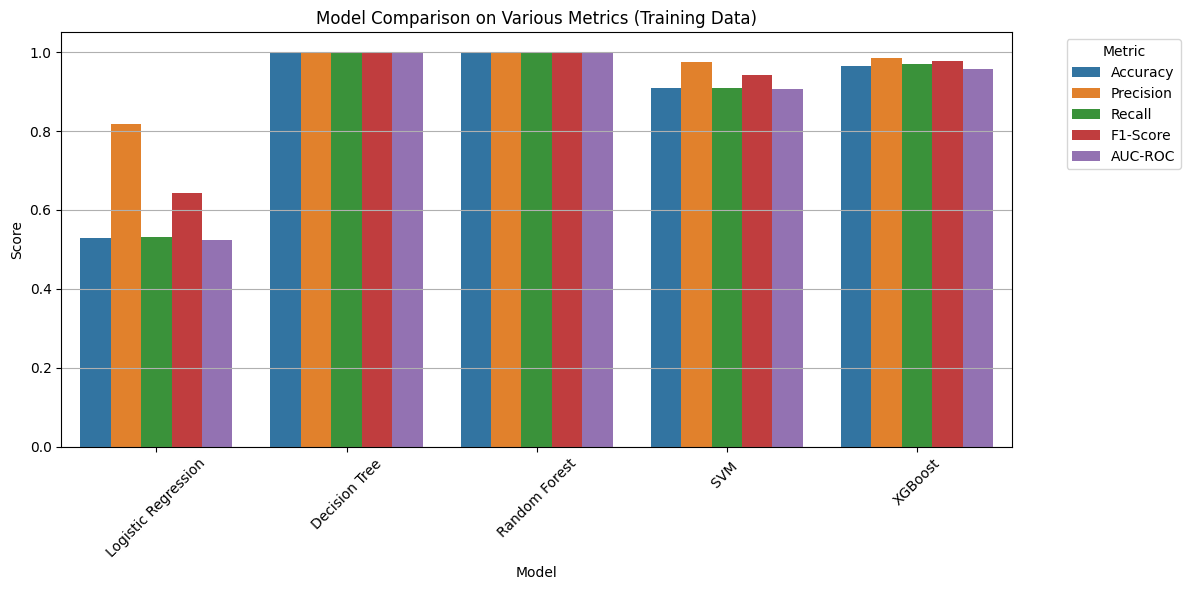

In [79]:
# Reshape the DataFrame for Seaborn (melt into long-form)
results_long = train_results_df.reset_index().melt(id_vars='index', 
                                             var_name='Metric', 
                                             value_name='Score')
results_long.rename(columns={'index': 'Model'}, inplace=True)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_long)

plt.title("Model Comparison on Various Metrics (Training Data)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [80]:
print("Testing Data Performance")
test_results_df

Testing Data Performance


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Logistic Regression,0.5156,0.805315,0.521772,0.633253,0.506226
Decision Tree,0.9368,0.972240,0.948222,0.960081,0.919451
Random Forest,0.9772,0.973259,0.999002,0.985962,0.944085
SVM,0.8625,0.945160,0.879476,0.911136,0.836715
XGBoost,0.9167,0.952495,0.943107,0.947778,0.876591


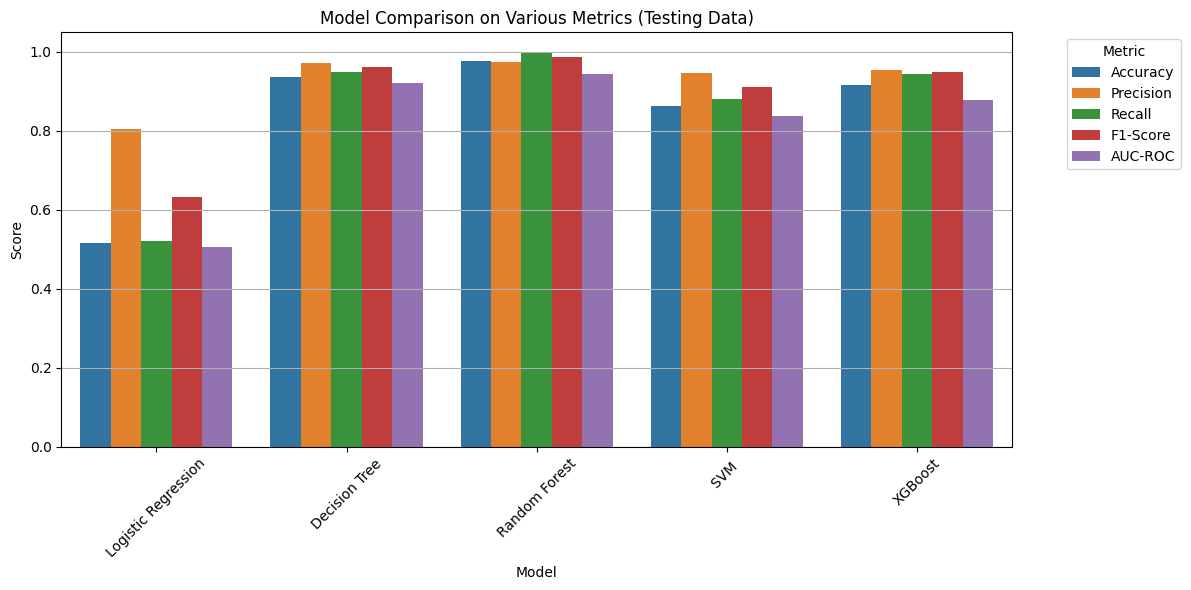

In [81]:
# Reshape the DataFrame for Seaborn (melt into long-form)
results_long = test_results_df.reset_index().melt(id_vars='index', 
                                             var_name='Metric', 
                                             value_name='Score')
results_long.rename(columns={'index': 'Model'}, inplace=True)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_long)

plt.title("Model Comparison on Various Metrics (Testing Data)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Train vs Test Accuracy

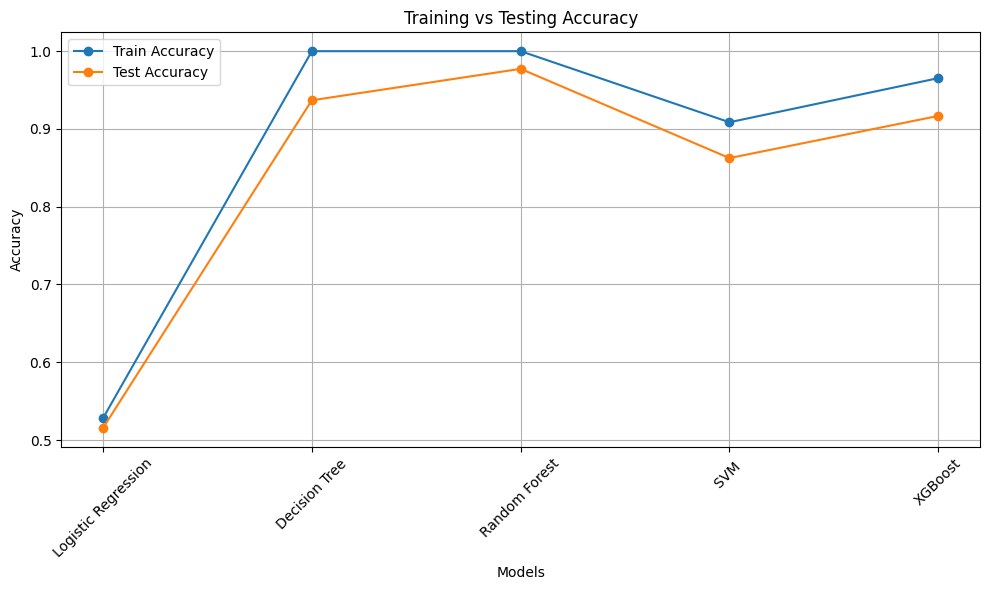

In [83]:
plt.figure(figsize=(10,6))
plt.plot(models.keys(), train_scores, marker='o', label='Train Accuracy')
plt.plot(models.keys(), test_scores, marker='o', label='Test Accuracy')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Random Forest Pipeline For Deployment 

In [242]:
model_pipeline = Pipeline([
        ('preprocessing', preprocessor),  # The full preprocessor with scaler, ordinal, one-hot
        ('smote', SMOTE(random_state=42)),
        ('pca', PCA(n_components=0.95)),
        ('classifier', RandomForestClassifier())
    ])
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(categories=[['No '
                                                                                               'Formal '
                                                                                               'Education',
                                                                                               'High '
                                                                                               'School',
                                                                                               "Bachelor's",
                                                                                               "Master's",
                                                                                               'PhD'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['No '
                                                                                               'Influence',
                                                                                               'Some '
                                                                                               'Friends '
                                                                                               'Us...
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Occupation',
                                                   'Medical_Condition',
                                                   'Social_Behavior',
                                                   'Living_Situation',
                                                   'Drug_Motive',
                                                   'Social_Time_Spent',
                                                   'Mental_Health_Issues',
                                                   'Lives_With_User'])])),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=0.95)),
                ('classifier', RandomForestClassifier())])

In [246]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model_pipeline, file)